# Proyecto Deportistas

En este proyecto se trabajara con una base de datos la cual contiene información sobre los jugadores mejor pagados por cada deporte

In [3]:
# Importando las librerias que se utilizaran en el proyecto
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Utilizamos pandas para leer nuestro archivo .csv
df = pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020) (3).csv')
df

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


In [5]:
# el atributo columns nos muestra el nombre de todas las columnas que contiene nuestra tabla
df.columns

Index(['S.NO', 'Name', 'Nationality', 'Current Rank', 'Previous Year Rank',
       'Sport', 'Year', 'earnings ($ million)'],
      dtype='object')

In [6]:
df.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


# Data Cleaning


In [7]:
# Copiamos el dataframe para no alterar el original
df2 = df

In [8]:
# Revisamos el tipo de dato que tiene cada columna
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [9]:
# Cambiamos a mayusculas los valores de texto
df2['Name'] = df['Name'].str.upper()
df2['Sport'] = df['Sport'].str.upper()
df2['Nationality'] = df['Nationality'].str.upper()

In [10]:
# Utilizamos el metodo unique() para revisar los diferentes valores unicos en la columna que queremos limpiar
df2['Previous Year Rank'].unique()

array([nan, '8', '1', '>30', '4', '5', '12', '6', '3', '9', '17', '13',
       '10', '>40', '19', '40', '7', '11', '30', '22', '20', 'not ranked',
       '38', '2', '15', '14', '26', 'none', '18', '>10', '>20', '?', '24',
       '21', '>14', '>100', '??'], dtype=object)

In [11]:
# Limpiamos la columna Previous Year Rank reemplazando los valores extranios a numeros 
df2['PYR_trimmed'] = df2['Previous Year Rank'].str.replace('>100', '101')
df2['PYR_trimmed'] = df2['PYR_trimmed'].str.replace('>30', '31')
df2['PYR_trimmed'] = df2['PYR_trimmed'].str.replace('>40', '41')
df2['PYR_trimmed'] = df2['PYR_trimmed'].str.replace('not ranked', '150')
df2['PYR_trimmed'] = df2['PYR_trimmed'].str.replace('none', '0')
df2['PYR_trimmed'] = df2['PYR_trimmed'].str.replace('>10', '11')
df2['PYR_trimmed'] = df2['PYR_trimmed'].str.replace('>20', '21')
df2['PYR_trimmed'] = df2['PYR_trimmed'].str.replace('?', '0')
df2['PYR_trimmed'] = df2['PYR_trimmed'].str.replace('>14', '15')
df2['PYR_trimmed'] = df2['PYR_trimmed'].fillna(0)
df2['PYR_trimmed']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':


0        0
1        0
2        0
3        0
4        0
      ... 
296      9
297     10
298     11
299    101
300    101
Name: PYR_trimmed, Length: 301, dtype: object

In [12]:
# Limpiamos la columna Sport agrupando cada tipo de deporte en un mismo valor
df2['Sport'] = df2['Sport'].str.replace('AUTO RACING', 'F1 RACING')
df2['Sport'] = df2['Sport'].str.replace('NBA', 'BASKETBALL')
df2['Sport'] = df2['Sport'].str.replace('AMERICAN FOOTBALL / BASEBALL', 'AMERICAN FOOTBALL')
df2['Sport'] = df2['Sport'].str.replace('F1 MOTORSPORTS', 'F1 RACING')
df2['Sport'] = df2['Sport'].str.replace('AUTO RACING (NASCAR)', 'NASCAR')
df2['Sport'] = df2['Sport'].str.replace('ICE HOCKEY', 'HOCKEY')
df2['Sport'] = df2['Sport'].str.replace('NFL', 'AMERICAN FOOTBALL')
df2['Sport'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


array(['BOXING', 'F1 RACING', 'GOLF', 'BASKETBALL', 'TENNIS',
       'AMERICAN FOOTBALL', 'BASEBALL', 'HOCKEY', 'NASCAR',
       'F1 RACING (NASCAR)', 'SOCCER', 'CYCLING', 'MOTORCYCLE GP', 'MMA'],
      dtype=object)

In [13]:
# Modificamos de la columna Name el nombre correctamente
df2['Name'] = df2['Name'].str.replace('AARON ROGERS', 'AARON RODGERS')

In [14]:
df2['Sport'].unique()

array(['BOXING', 'F1 RACING', 'GOLF', 'BASKETBALL', 'TENNIS',
       'AMERICAN FOOTBALL', 'BASEBALL', 'HOCKEY', 'NASCAR',
       'F1 RACING (NASCAR)', 'SOCCER', 'CYCLING', 'MOTORCYCLE GP', 'MMA'],
      dtype=object)

In [15]:
# Revisamos la columna para asegurarnos que se aplicaron los cambios
df2['PYR_trimmed'].unique()

array([0, '8', '1', '31', '4', '5', '12', '6', '3', '9', '17', '13', '10',
       '41', '19', '40', '7', '11', '30', '22', '20', '150', '38', '2',
       '15', '14', '26', '0', '18', '21', '24', '101', '00'], dtype=object)

In [16]:
# Convertimos a numeros los valores
df2['PYR_trimmed'] = df2['PYR_trimmed'].astype(int)

In [17]:
# Creamos una columna que nos servira de contador para contrstar las siguientes preguntas
df2['counter'] = 1

# Preguntas

## Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.

In [37]:
# Se crea una variable que guarda en una lista los nombres de los deportistas
players = df2["Name"].sort_values(ascending=True).unique()
# Se crea una funcion que recibe como parametros la lista de los jugadores y el DataFrame
def crecimiento_jugador(jugadores, data):
    # Se crea un diccionario el cual guardara los nombres como llaves y el numero de veces que han subido de ranking como valor
    list_of_dic = {}
    # Se define un contador
    crecimiento=0
    # Se itera sobre la lista de jugadores cada valor
    for jugador in jugadores:  
        # A su vez se itera en los datos del jugador en años mayores a 2010 
        # el metodo iterrows() se utiliza para iterar sobre un DataFrame de pandas por fila     
        for index, row in data[(data["Name"] == jugador) & (data["Year"] >= 2010)].iterrows(): 
            # Se asigna a la variable current el valor en entero de la columna Current Rank
            current = int(row["Current Rank"])
            # Se asigna a la variable previous el valor en entero de la columna PYR_trimmed
            previous = int(row["PYR_trimmed"])
            # Si el ranking actual es menor al pasado significa que subio de ranking y aumentamos 1 al contador
            if current < previous:                
                crecimiento = crecimiento+1
        # Si el crecimiento fue mayor a 2 se agrega al jugador al diccionario
        if crecimiento > 2:            
            list_of_dic[jugador] = crecimiento
        # Se resetea el contador a 0
        crecimiento = 0
    # Se crea un nuevo DataFrame donde convertiremos el diccionario en tabla
    data_frame = pd.DataFrame(list(list_of_dic.items()), columns = ["jugador","crecimiento_ranking"])
    return data_frame

# Se crea una variable la cual guardara el resultado de la funcion
# Se da como parametros la lista de jugadores y el DataFrame
upRankin_df = crecimiento_jugador(players, df2)
# Se filtran los valores por crecimiento de ranking de menor a mayor
upRankin_df = upRankin_df.sort_values("crecimiento_ranking", ascending= True)
upRankin_df

,jugador,crecimiento_ranking
1,FLOYD MAYWEATHER,3
2,KEVIN DURANT,4
0,CRISTIANO RONALDO,5
3,LEBRON JAMES,5
4,LIONEL MESSI,6
5,ROGER FEDERER,7


## Atleta con el menor número de apariciones y mayores ganancias.


In [19]:
# Se crea un Data Frame nuevo el cual contendra los datos filtrados
df_filtrado = pd.DataFrame()

In [20]:
# Agrupamos por la columna Name y con el metodo sum() se suman los datos de las dos columnas indicadas
df_filtrado = df2.groupby(['Name'])[['counter', 'earnings ($ million)']].sum()

In [21]:
# Filtramos los valores resultantes 
# En donde va en ascendente la columna counter dandole el valor True y dejamos en False las ganancias para obtener el valor mas alto
df_filtrado = df_filtrado.sort_values(by=['counter', 'earnings ($ million)'], ascending=(True, False))
# Reestablecemos el indice del DataFrame
df_filtrado.reset_index(inplace=True)

In [22]:
df_filtrado.head(10)

,Name,counter,earnings ($ million)
0,CONOR MCGREGOR,1,99.0
1,CANELO ALVAREZ,1,94.0
2,RUSSELL WILSON,1,89.5
3,KIRK COUSINS,1,60.5
4,MATTHEW STAFFORD,1,59.5
5,CARSON WENTZ,1,59.1
6,NOVAK DJOKOVIC,1,55.8
7,MUHAMMAD ALI,1,55.0
8,CAM NEWTON,1,53.1
9,JORDAN SPIETH,1,52.8


Text(0, 0.5, 'Ganancia en millones')

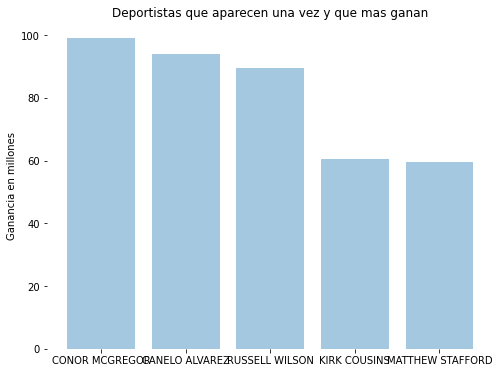

In [23]:
# Creamos una grafica de barras para mostrar de una mejor manera los resultados
bar_graph = plt.figure(figsize= (8,6))
plt.bar(df_filtrado['Name'].head(5), df_filtrado['earnings ($ million)'].head(5), align='center', alpha=0.4, edgecolor = 'none')
plt.box(False)
plt.title('Deportistas que aparecen una vez y que mas ganan')
plt.ylabel('Ganancia en millones')

## Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados.


In [24]:
# Agrupamos las columnas de Sport y Nationality y con el metodo sum() sumamos la columna contador para obtener el valor que necesitamos
# Y con el metodo sort_values() filtramos los datos mostrando la columna sumada de contador de manera descendente
df_filtrado = df2.groupby(['Sport', 'Nationality'])[['counter']].sum().sort_values('counter', ascending=False)

In [25]:
# Acomodamos el encabezado utilizando reset_index()
df_filtrado.reset_index(inplace=True)
df_filtrado

,Sport,Nationality,counter
0,BASKETBALL,USA,82
1,GOLF,USA,42
2,BOXING,USA,40
3,AMERICAN FOOTBALL,USA,21
4,F1 RACING,GERMANY,13
5,TENNIS,SWITZERLAND,12
6,SOCCER,PORTUGAL,10
7,SOCCER,UK,9
8,SOCCER,ARGENTINA,9
9,TENNIS,USA,9


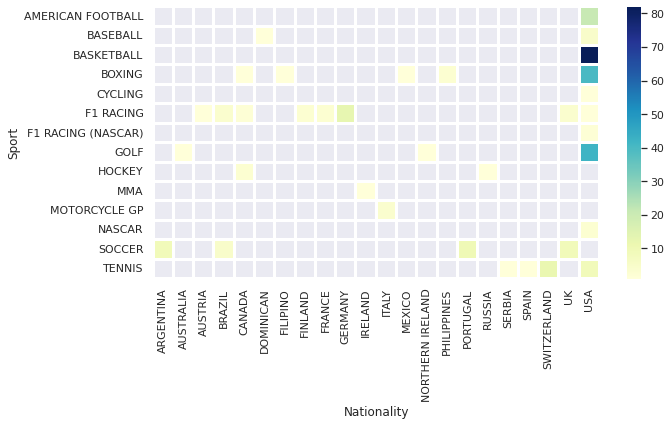

In [26]:
# Mostramos de manera grafica los datos por medio de seaborn con la grafica de heatmap
df_heatmap = df_filtrado.pivot('Sport','Nationality', 'counter')
plt.figure(figsize=(10,5))
sns.set()
ax = sns.heatmap(df_heatmap, linewidths=2, cmap='YlGnBu')

## País con mayor número de deportes con atletas en el dataset.


In [27]:
# Agrupamos por Nationality y utilizando sum() sobre la columna counter podemos contar cuantos valores tiene cada pais
df3 = df2.groupby(['Nationality'])[['counter']].sum().sort_values('counter', ascending=False)
# Acomodamos el encabezado utilizando reset_index()
df3.reset_index(inplace=True)
df3

,Nationality,counter
0,USA,206
1,GERMANY,13
2,UK,13
3,SWITZERLAND,12
4,PORTUGAL,10
5,ARGENTINA,9
6,BRAZIL,9
7,CANADA,6
8,ITALY,4
9,FINLAND,3


## ¿Cuántos atletas por deporte tiene cada país?


In [28]:
# Agrupamos por la columna Sport y Nationality y con sum() sobre la columna counter, nos devuelve el total de atletas por deporte que tiene cada pais
df4 = df2.groupby(['Sport', 'Nationality'])[['counter']].sum().sort_values('counter', ascending=False)
# Acomodamos el encabezado utilizando reset_index()
df4.reset_index(inplace=True)
df4

,Sport,Nationality,counter
0,BASKETBALL,USA,82
1,GOLF,USA,42
2,BOXING,USA,40
3,AMERICAN FOOTBALL,USA,21
4,F1 RACING,GERMANY,13
5,TENNIS,SWITZERLAND,12
6,SOCCER,PORTUGAL,10
7,SOCCER,UK,9
8,SOCCER,ARGENTINA,9
9,TENNIS,USA,9


## Ganancia mínima y máxima (dentro del dataset) por deporte y por país.


In [29]:
# Se agrupa por las columnas Sport y Nationality el DataFrame
# Con el metodo agg() sobre la columna earnings ($ million) agregamos dos nuevas columnas 
# Estas dos nuevas columnas nos devuelven las ganancias minimas y maximas que tiene cada deporte por pais
df5 = df2.groupby(['Sport', 'Nationality'])['earnings ($ million)'].agg(Monto_minimo='min', Monto_maximo='max')
# Acomodamos el encabezado utilizando reset_index()
df5.reset_index(inplace=True)
df5

,Sport,Nationality,Monto_minimo,Monto_maximo
0,AMERICAN FOOTBALL,USA,9.5,89.5
1,BASEBALL,DOMINICAN,35.0,35.0
2,BASEBALL,USA,12.7,29.0
3,BASKETBALL,USA,8.1,89.0
4,BOXING,CANADA,10.2,10.2
5,BOXING,FILIPINO,62.0,62.0
6,BOXING,MEXICO,94.0,94.0
7,BOXING,PHILIPPINES,40.0,160.0
8,BOXING,USA,8.1,300.0
9,CYCLING,USA,28.0,28.0


## Atleta con mayores ganancias por deporte por década


In [30]:
# Se revisan los diferentes anios que contiene nuestro DataFrame
df2['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [31]:
df2['Decade'] = pd.cut(x=df2['Year'], 
                       bins=[1989,2000,2010,2020,2030], 
                       labels=["1990-1999","2000-2009","2010-2020","2020-2030"])

In [32]:
# Se agrupa el DataFrame por las columnas Name, Sport, Decade y se suman los valores de la columna earnings ($ million)
df6 = df2.groupby(['Name', 'Sport', 'Decade'])['earnings ($ million)'].sum().to_frame()
# Se eliminan los valores en 0
df6 = df6[df6['earnings ($ million)']>0]
# Se acomoda el encabezado con el metodo reset_index()
df6.reset_index(inplace=True)
# Se filtran los valores dando todas las columnas en ascendente a excepcion de la columna earnings ($ million)
df6 = df6.sort_values(['Name','Sport', 'Decade', 'earnings ($ million)'], ascending=(True, True, True, False))

# Se obtienen los valores unicos para la columna Decade y Sport
decades = df6['Decade'].unique().sort_values(ascending=True).unique()
sports = df6['Sport'].sort_values(ascending=True).unique()

In [41]:
# Se crea un DataFrame donde se agregaran a los deportistas mejor pagados por decada y deporte
best_athlete = pd.DataFrame()
# Se utiliza un ciclo for para recorrer el el DataFrame por deporte y por decada agregando con el metodo append() cada fila a best_athlete
for sport in sports:
    for decade in decades:
      best_athlete = pd.DataFrame.append((df6[(df6["Sport"] == sport) & (df6["Decade"] == decade)].sort_values(by= (["earnings ($ million)", "Decade"]), ascending= (False, True)).head(1)), other= best_athlete)
# Se filtra la tabla por de manera ascendente las columnas Sport y Decade
best_athlete = best_athlete.sort_values(['Sport', 'Decade'], ascending=(True, True))
best_athlete

,Name,Sport,Decade,earnings ($ million)
22,DEION SANDERS,AMERICAN FOOTBALL,1990-1999,22.5
80,PEYTON MANNING,AMERICAN FOOTBALL,2000-2009,42.0
0,AARON RODGERS,AMERICAN FOOTBALL,2010-2020,138.3
31,GARY SHEFFIELD,BASEBALL,1990-1999,17.2
2,ALEX RODRIGUEZ,BASEBALL,2000-2009,81.2
3,ALEX RODRIGUEZ,BASEBALL,2010-2020,35.0
63,MICHAEL JORDAN,BASKETBALL,1990-1999,446.8
64,MICHAEL JORDAN,BASKETBALL,2000-2009,292.0
54,LEBRON JAMES,BASKETBALL,2010-2020,724.0
70,MIKE TYSON,BOXING,1990-1999,283.1


## Ganancia total por cada deporte por cada año.


In [34]:

df_xyear = df2.groupby(['Year','Sport'])['earnings ($ million)'].sum().to_frame()
df_xyear.reset_index(inplace= True)
df_xyear

,Year,Sport,earnings ($ million)
0,1990,BASKETBALL,8.1
1,1990,BOXING,75.7
2,1990,F1 RACING,19.0
3,1990,GOLF,25.2
4,1991,BASKETBALL,16.0
...,...,...,...
168,2020,AMERICAN FOOTBALL,119.6
169,2020,BASKETBALL,226.5
170,2020,GOLF,62.3
171,2020,SOCCER,304.5
